In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

Q5.Use Naive bayes, K-nearest, and Decision tree classification algorithms and build classifiers.Divide the data set into training and test set. Compare the accuracy of the different classifiers under the following situations:

5.1 a) Training set=75% Test set=25%  b) Training set=66.6%(2/3rd of total),Test set=33.3%

5.2 Training set is chosen by i) hold out method ii) Randomsubsampling iii) Cross-Validation. Compare the accuracy of the classifiers obtained.

5.3 Data is scaled to standard format.

In [3]:
import sklearn
from sklearn.datasets import *
dir(sklearn.datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [4]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(iris.filename)
print(iris.feature_names)


/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
iris=pd.read_csv('/content/gdrive/MyDrive/iris.csv')
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [7]:
iris=iris.drop_duplicates()

In [8]:
X=iris.values[:,:-1]
Y=iris.values[:,-1]

In [9]:
print(X.shape)
print(Y.shape)

(147, 4)
(147,)


In [10]:
import numpy as np
classLabels=np.unique(Y)
classLabels

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
test_val = 0.25
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_val)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(110, 4)
(37, 4)
(110,)
(37,)


In [13]:
#help(DecisionTreeClassifier())

In [14]:
DTclassifer = DecisionTreeClassifier().fit(X_train,Y_train)

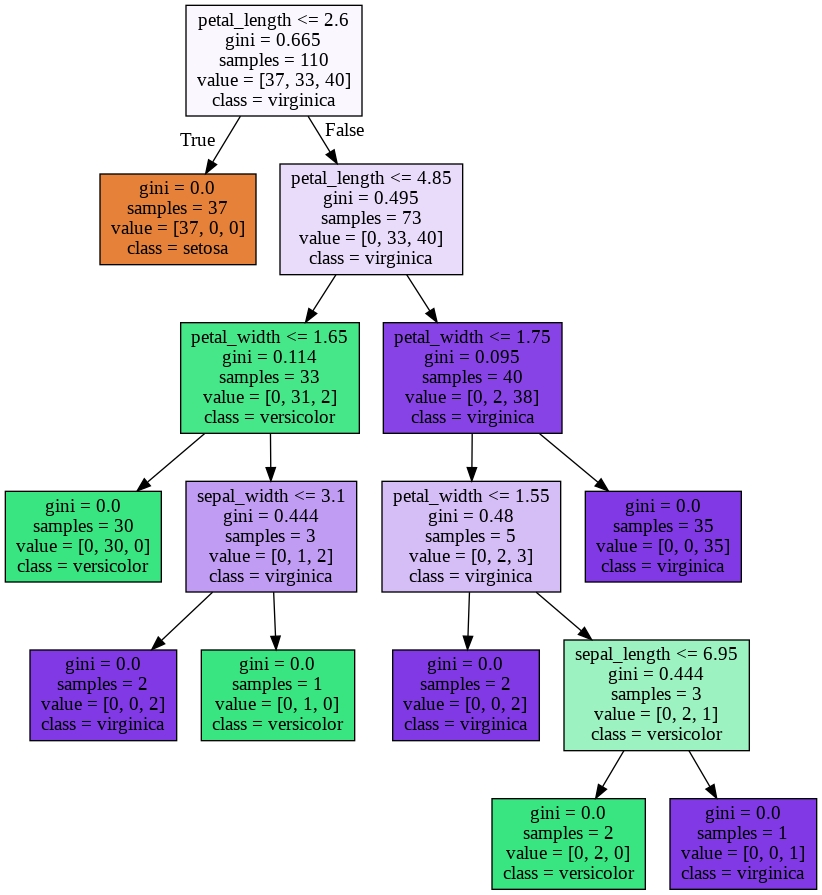

In [15]:
import pydotplus
from IPython.display import Image
dot_data=export_graphviz(DTclassifer, feature_names=iris.columns[:-1], class_names=classLabels, filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [16]:
print(Y_test)
Y_predict=DTclassifer.predict(X_test)
print(Y_predict)

['setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'virginica' 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica'
 'virginica' 'versicolor' 'virginica' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'versicolor']
['setosa' 'versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'virginica' 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica'
 'virginica' 'versicolor' 'virginica' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'versicolor']


In [17]:
accuracy_score(Y_test, Y_predict)

0.9459459459459459

In [18]:
conf=confusion_matrix(Y_test, Y_predict)
conf

array([[11,  0,  0],
       [ 0, 15,  2],
       [ 0,  0,  9]])

In [19]:
!pip install mlxtend --upgrade --no-deps

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


In [20]:
#import mlxtend
#help(mlxtend)

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2698a7f250>)

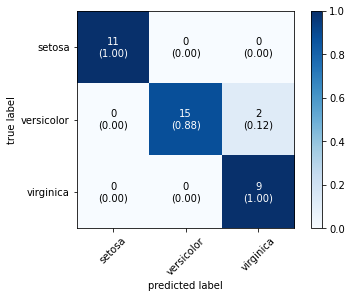

In [21]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=conf, colorbar=True, show_absolute=True, show_normed=True, class_names=classLabels)

In [22]:
clf_report=classification_report(Y_test, Y_predict, target_names=classLabels, digits=5, output_dict=True)
print(clf_report)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11}, 'versicolor': {'precision': 1.0, 'recall': 0.8823529411764706, 'f1-score': 0.9375, 'support': 17}, 'virginica': {'precision': 0.8181818181818182, 'recall': 1.0, 'f1-score': 0.9, 'support': 9}, 'accuracy': 0.9459459459459459, 'macro avg': {'precision': 0.9393939393939394, 'recall': 0.9607843137254902, 'f1-score': 0.9458333333333333, 'support': 37}, 'weighted avg': {'precision': 0.9557739557739559, 'recall': 0.9459459459459459, 'f1-score': 0.9469594594594595, 'support': 37}}


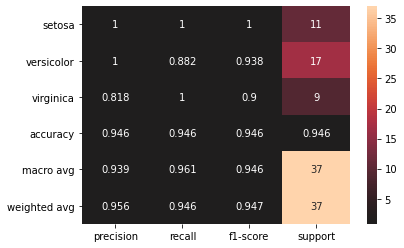

In [23]:
import seaborn as sns
sns.heatmap(pd.DataFrame(clf_report).T, annot=True, fmt='.3g',center=True)#.T is for transpose
                                                                          #.3g is used to display values till three decimal places

In [37]:
numTimes=10

accuracy=list()
for i in range(numTimes):
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_val)
  DTclassifer = DecisionTreeClassifier(criterion="entropy").fit(X_train,Y_train)
  Y_predict=DTclassifer.predict(X_test)
  accuracy.append(accuracy_score(Y_test, Y_predict))
print(sum(accuracy)/numTimes)

0.9243243243243244


In [45]:
k=10
scores=cross_val_score(DecisionTreeClassifier(),X,Y,cv=k)
print(scores,scores.mean())

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.92857143 1.         1.        ] 0.9528571428571428


In [35]:
test_val1 =(1/3)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X,Y,test_size=test_val)

In [25]:
print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

(110, 4)
(37, 4)
(110,)
(37,)


In [26]:
#help(DecisionTreeClassifier())

In [27]:
DTclassifer = DecisionTreeClassifier().fit(X_train1,Y_train1)

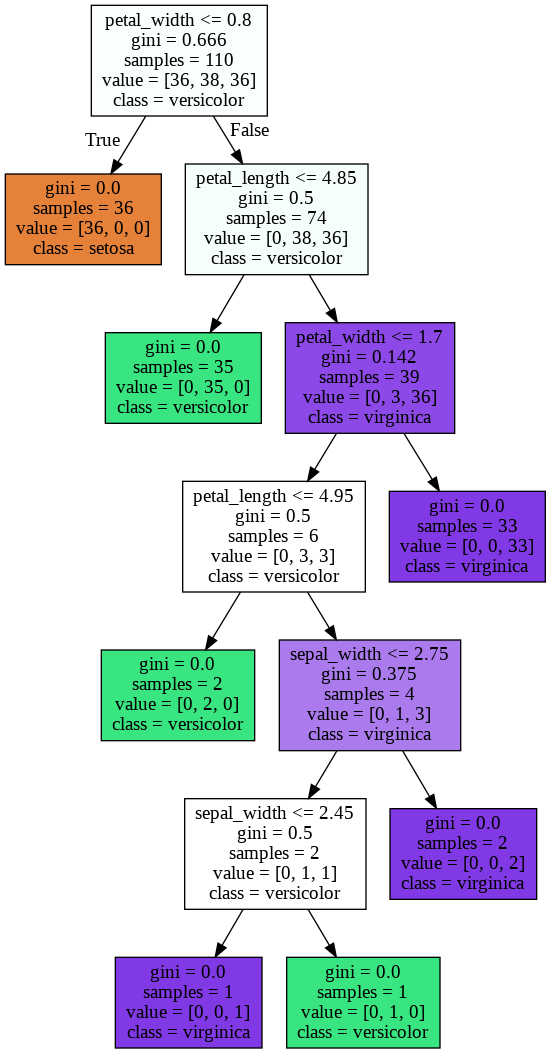

In [28]:
import pydotplus
from IPython.display import Image
dot_data1=export_graphviz(DTclassifer, feature_names=iris.columns[:-1], class_names=classLabels, filled=True)
graph1=pydotplus.graph_from_dot_data(dot_data1)
Image(graph1.create_png())

In [29]:
print(Y_test1)
Y_predict1=DTclassifer.predict(X_test1)
print(Y_predict1)

['versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'virginica' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'setosa' 'setosa' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica']
['versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'virginica' 'virginica' 'virginica' 'setosa' 'setosa' 'setosa'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica']


In [30]:
accuracy_score(Y_test1, Y_predict1)

0.8648648648648649

In [31]:
conf1=confusion_matrix(Y_test1, Y_predict1)
conf1

array([[12,  0,  0],
       [ 0, 11,  1],
       [ 0,  4,  9]])

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2699b0f1d0>)

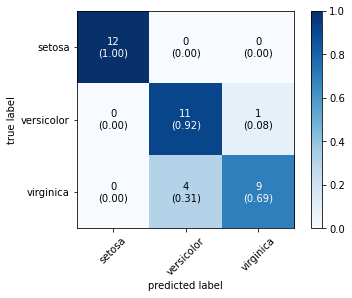

In [32]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=conf1, colorbar=True, show_absolute=True, show_normed=True, class_names=classLabels)

In [33]:
clf_report1=classification_report(Y_test1, Y_predict1, target_names=classLabels, digits=5, output_dict=True)
print(clf_report1)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12}, 'versicolor': {'precision': 0.7333333333333333, 'recall': 0.9166666666666666, 'f1-score': 0.8148148148148148, 'support': 12}, 'virginica': {'precision': 0.9, 'recall': 0.6923076923076923, 'f1-score': 0.7826086956521738, 'support': 13}, 'accuracy': 0.8648648648648649, 'macro avg': {'precision': 0.8777777777777778, 'recall': 0.8696581196581196, 'f1-score': 0.8658078368223295, 'support': 37}, 'weighted avg': {'precision': 0.8783783783783784, 'recall': 0.8648648648648649, 'f1-score': 0.8635592113852983, 'support': 37}}


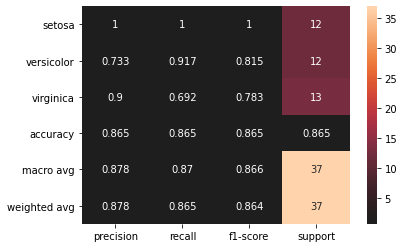

In [34]:
import seaborn as sns
sns.heatmap(pd.DataFrame(clf_report1).T, annot=True, fmt='.3g',center=True)#.T is for transpose
                                                                          #.3g is used to display values till three decimal places

In [38]:
numTimes=10

accuracy=list()
for i in range(numTimes):
  X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X,Y,test_size=test_val)
  DTclassifer = DecisionTreeClassifier(criterion="entropy").fit(X_train1,Y_train1)
  Y_predict1=DTclassifer.predict(X_test1)
  accuracy.append(accuracy_score(Y_test1, Y_predict1))
print(sum(accuracy)/numTimes)

0.9513513513513514


In [46]:
k=10
scores1=cross_val_score(DecisionTreeClassifier(),X,Y,cv=k)
print(scores1,scores.mean())

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ] 0.9528571428571428
